In [1]:
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
# import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
# from plotnine import *
import io

import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('Agri_all.csv')
df

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,4.400000,12.800000,35.200000,0.000000,2.600000,1.600000,0.000000
1,2005-01-04,200501,104,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,-0.200000,8.800000,26.000000,0.000000,2.800000,2.800000,0.000000
2,2005-01-05,200501,105,마늘,20928.571429,1013.00,3.33,49.58,58.27,65.4,60.5,-1.400000,11.200000,33.400000,0.000000,0.600000,3.200000,0.000000
3,2005-01-06,200501,106,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.800000,7.800000,31.200000,1.200000,1.200000,2.600000,0.000000
4,2005-01-07,200501,107,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.000000,7.600000,28.400000,0.000000,2.800000,2.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.13,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
15876,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
15877,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
15878,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.13,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


In [3]:
df = df[df['Product'] == '깻잎']
df.rename(columns = {'YMD' : 'ds', 'Price' : 'y'}, inplace=True)
df = df.reset_index()
df = df.drop(columns='index')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,깻잎,4534.333333,1013.00,3.33,NaN,53.348,65.4,60.5,4.500000,10.500000,27.000000,0.000000,2.000000,0.500000,0.000000
1,2005-01-04,200501,104,깻잎,4614.673913,1013.00,3.33,NaN,53.348,65.4,60.5,-2.000000,9.000000,23.000000,0.000000,2.500000,4.000000,0.000000
2,2005-01-05,200501,105,깻잎,5114.642857,1013.00,3.33,NaN,53.348,65.4,60.5,-3.000000,13.500000,28.500000,0.000000,0.500000,3.500000,0.000000
3,2005-01-06,200501,106,깻잎,4895.595238,1013.00,3.33,NaN,53.348,65.4,60.5,1.000000,9.000000,27.500000,0.000000,1.000000,3.000000,0.000000
4,2005-01-07,200501,107,깻잎,4615.465116,1013.00,3.33,NaN,53.348,65.4,60.5,0.500000,8.000000,24.500000,0.000000,2.000000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2020-12-24,202012,1224,깻잎,5960.655738,1180.05,0.70,NaN,87.660,108.6,116.4,3.769231,10.538462,56.000000,0.000000,1.769231,4.615385,0.000000
3966,2020-12-28,202012,1228,깻잎,7610.655738,1180.05,0.70,NaN,87.660,108.6,116.4,3.076923,12.307692,86.923077,0.000000,0.000000,3.230769,0.000000
3967,2020-12-29,202012,1229,깻잎,7375.833333,1180.05,0.70,NaN,87.660,108.6,116.4,2.384615,11.461538,81.307692,1.000000,1.615385,2.230769,0.230769
3968,2020-12-30,202012,1230,깻잎,7581.803279,1180.05,0.70,NaN,87.660,108.6,116.4,-5.285714,7.214286,53.714286,0.428571,4.357143,5.928571,0.285714


In [4]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.strftime('%Y-%m')
df = df.reset_index()
df = df.drop(columns='index')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01,200501,103,깻잎,4534.333333,1013.00,3.33,NaN,53.348,65.4,60.5,4.500000,10.500000,27.000000,0.000000,2.000000,0.500000,0.000000
1,2005-01,200501,104,깻잎,4614.673913,1013.00,3.33,NaN,53.348,65.4,60.5,-2.000000,9.000000,23.000000,0.000000,2.500000,4.000000,0.000000
2,2005-01,200501,105,깻잎,5114.642857,1013.00,3.33,NaN,53.348,65.4,60.5,-3.000000,13.500000,28.500000,0.000000,0.500000,3.500000,0.000000
3,2005-01,200501,106,깻잎,4895.595238,1013.00,3.33,NaN,53.348,65.4,60.5,1.000000,9.000000,27.500000,0.000000,1.000000,3.000000,0.000000
4,2005-01,200501,107,깻잎,4615.465116,1013.00,3.33,NaN,53.348,65.4,60.5,0.500000,8.000000,24.500000,0.000000,2.000000,4.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2020-12,202012,1224,깻잎,5960.655738,1180.05,0.70,NaN,87.660,108.6,116.4,3.769231,10.538462,56.000000,0.000000,1.769231,4.615385,0.000000
3966,2020-12,202012,1228,깻잎,7610.655738,1180.05,0.70,NaN,87.660,108.6,116.4,3.076923,12.307692,86.923077,0.000000,0.000000,3.230769,0.000000
3967,2020-12,202012,1229,깻잎,7375.833333,1180.05,0.70,NaN,87.660,108.6,116.4,2.384615,11.461538,81.307692,1.000000,1.615385,2.230769,0.230769
3968,2020-12,202012,1230,깻잎,7581.803279,1180.05,0.70,NaN,87.660,108.6,116.4,-5.285714,7.214286,53.714286,0.428571,4.357143,5.928571,0.285714


In [5]:
df = df.groupby('ds').mean()
df = df.reset_index()
df = df.rename(columns = {'index' : 'ds'})
df

,ds,YM,MD,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01,200501.0,116.238095,4606.525022,1013.00,3.33,NaN,53.348,65.4,60.5,-0.904762,9.309524,31.476190,0.238095,1.190476,2.738095,0.000000
1,2005-02,200502.0,214.764706,4551.012312,1013.00,3.33,NaN,56.294,65.9,60.3,-0.088235,8.352941,29.352941,1.705882,1.647059,2.558824,0.000000
2,2005-03,200503.0,316.681818,3670.232558,1013.00,3.33,NaN,50.309,67.1,61.5,5.522727,12.045455,28.000000,2.613636,1.568182,3.568182,0.000000
3,2005-04,200504.0,415.761905,3165.027685,1013.00,3.33,NaN,42.828,65.6,59.5,13.690476,14.047619,25.214286,0.761905,1.642857,4.047619,0.000000
4,2005-05,200505.0,515.954545,2880.517970,1013.00,3.33,NaN,39.602,66.3,59.4,16.977273,15.409091,29.204545,2.409091,1.250000,4.159091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020-08,202008.0,816.200000,7877.928315,1180.05,0.70,NaN,127.810,95.9,99.2,27.652657,8.311176,74.427074,7.790204,1.375099,4.199631,0.978063
188,2020-09,202009.0,914.619048,7777.987711,1180.05,0.70,NaN,134.970,98.0,104.3,21.118801,8.888583,74.939130,7.232733,1.477530,3.593086,0.187500
189,2020-10,202010.0,1017.947368,5083.387514,1180.05,0.70,NaN,107.410,101.4,112.1,13.651822,11.854251,63.813765,0.101215,1.170040,5.097166,0.000000
190,2020-11,202011.0,1115.238095,4258.717358,1180.05,0.70,NaN,85.940,105.6,114.8,8.930403,11.245421,59.633700,1.223443,1.424908,4.908425,0.227106


In [6]:
df_raw = df.copy()
df['y'] = np.log(df['y'])

In [7]:
Q1=df.y.quantile(0.25)
Q3=df.y.quantile(0.75)
IQR = Q3-Q1
LT=Q1-1.5*IQR
HT= Q3+1.5*IQR
print(LT, HT)
df['outlier']=np.where(((df['y']<LT)|(df['y']>HT)),'yes','no')

7.722462320908248 9.010678183728272


In [8]:
df.loc[(df['outlier']=='yes'), 'y'] = None
df

,ds,YM,MD,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
0,2005-01,200501.0,116.238095,8.435229,1013.00,3.33,NaN,53.348,65.4,60.5,-0.904762,9.309524,31.476190,0.238095,1.190476,2.738095,0.000000,no
1,2005-02,200502.0,214.764706,8.423105,1013.00,3.33,NaN,56.294,65.9,60.3,-0.088235,8.352941,29.352941,1.705882,1.647059,2.558824,0.000000,no
2,2005-03,200503.0,316.681818,8.208010,1013.00,3.33,NaN,50.309,67.1,61.5,5.522727,12.045455,28.000000,2.613636,1.568182,3.568182,0.000000,no
3,2005-04,200504.0,415.761905,8.059917,1013.00,3.33,NaN,42.828,65.6,59.5,13.690476,14.047619,25.214286,0.761905,1.642857,4.047619,0.000000,no
4,2005-05,200505.0,515.954545,7.965725,1013.00,3.33,NaN,39.602,66.3,59.4,16.977273,15.409091,29.204545,2.409091,1.250000,4.159091,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020-08,202008.0,816.200000,8.971820,1180.05,0.70,NaN,127.810,95.9,99.2,27.652657,8.311176,74.427074,7.790204,1.375099,4.199631,0.978063,no
188,2020-09,202009.0,914.619048,8.959053,1180.05,0.70,NaN,134.970,98.0,104.3,21.118801,8.888583,74.939130,7.232733,1.477530,3.593086,0.187500,no
189,2020-10,202010.0,1017.947368,8.533733,1180.05,0.70,NaN,107.410,101.4,112.1,13.651822,11.854251,63.813765,0.101215,1.170040,5.097166,0.000000,no
190,2020-11,202011.0,1115.238095,8.356723,1180.05,0.70,NaN,85.940,105.6,114.8,8.930403,11.245421,59.633700,1.223443,1.424908,4.908425,0.227106,no


In [9]:
train = df.iloc[:180]      
test = df.iloc[180:]

In [10]:
train.shape, test.shape

((180, 18), (12, 18))

In [11]:
from sklearn.model_selection import ParameterGrid
params_grid = {
              'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]
               }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [12]:
# model_parameters = pd.DataFrame(columns = ['MAE','Parameters'])
# for p in grid:
#     LOL = pd.DataFrame()
#     print(p)
# #    random.seed(0)
#     train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
#                          holidays_prior_scale = p['holidays_prior_scale'],
#                          n_changepoints = p['n_changepoints'],
#                          seasonality_mode = p['seasonality_mode'],
                         
#                          daily_seasonality = True,
#                          yearly_seasonality = True, 
#                          interval_width=0.95)
    
#     train_model.fit(train)
#     future = train_model.make_future_dataframe(periods=248, freq='D',include_history = False)
#     train_forecast = train_model.predict(future)
#     LOL=train_forecast[['ds','yhat']]
#     y_true= test['y'].values
#     y_pred = LOL['yhat'][:len(y_true)].values
#     mae = mean_absolute_error(y_true, y_pred)
#     print('Mean Absolute Error: %.3f' % mae)
#     model_parameters = model_parameters.append({'MAE':mae,'Parameters':p},ignore_index=True)

In [13]:
# parameters = model_parameters.sort_values(by=['MAE'])
# parameters = parameters.reset_index(drop=True)
# parameters.head()

In [14]:
# parameters['Parameters'][0]

In [15]:
train = train.drop(columns=['YM', 'MD', 'Food_Price_Index', 'Cereals_Price_Index',
       'DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity',
       'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine',
       'Warning_Count'
       ])
# train['Warning_Count'] = np.exp(train['Warning_Count'])
train.columns

Index(['ds', 'y', 'KRW_USD_EXR', 'Annual_Call_Rate', 'item_PPI', 'item_CPI',
       'outlier'],
      dtype='object')

In [17]:
final_model = Prophet(
                      changepoint_prior_scale= 0.3,
                      holidays_prior_scale = 0.5,
                      n_changepoints = 200,
                      seasonality_mode = 'multiplicative',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95
                     )
final_model.fit(train)

07:54:20 - cmdstanpy - INFO - Chain [1] start processing
07:54:21 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future = final_model.make_future_dataframe(periods=12, freq='M')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
185,2020-05-31,8.153267,7.831148,8.458626
186,2020-06-30,8.280128,7.893398,8.682561
187,2020-07-31,8.553693,8.089876,9.025323
188,2020-08-31,8.771823,8.196535,9.360679
189,2020-09-30,8.457598,7.817700,9.077757
190,2020-10-31,8.387281,7.674654,9.065380
191,2020-11-30,8.744239,7.925371,9.542486


In [19]:
df['y']=np.exp(df['y'])
forecast['yhat']=np.exp(forecast['yhat'])

In [29]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.strftime('%Y-%m')
df['ds'] = df['ds'].astype('str') + '-1'
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ds                       192 non-null    datetime64[ns]
 1   YM                       192 non-null    float64       
 2   MD                       192 non-null    float64       
 3   y                        191 non-null    float64       
 4   KRW_USD_EXR              192 non-null    float64       
 5   Annual_Call_Rate         192 non-null    float64       
 6   item_PPI                 0 non-null      float64       
 7   item_CPI                 192 non-null    float64       
 8   Food_Price_Index         192 non-null    float64       
 9   Cereals_Price_Index      192 non-null    float64       
 10  DayAvg_Temperature       192 non-null    float64       
 11  DayDiff_Temperature      192 non-null    float64       
 12  DayAvg_RelativeHumidity  192 non-nul

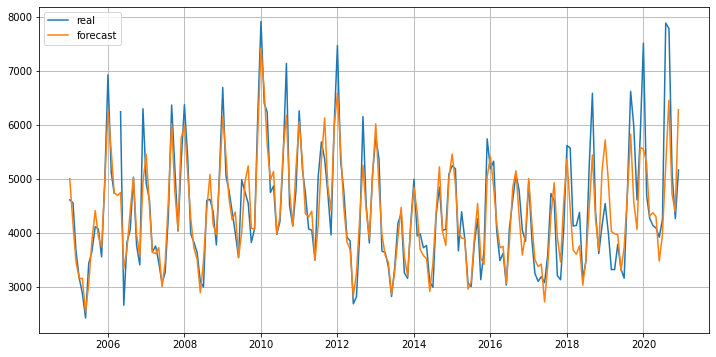

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [ ]:
evaluation_model = cross_validation(final_model, initial='720 days', period='180 days', horizon = '30 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('mae').head(5)

In [ ]:
evaluation_metrix = evaluation_metrix.sort_values('mae')

In [ ]:
evaluation_metrix.to_csv('Sesame_leaf_month_matrix.csv')